In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def read_edge(net_name):
    path = '/home/hermuba/data0118/network1122/'
    filename = path + net_name + '_lls_edgelist'
    
    # skip first line header!!
    with open(filename, 'rb') as f:
      
        net = nx.read_edgelist(f, nodetype = str, comments = '#')
    return(net)



In [3]:
string = read_edge('string')
refseq = read_edge('refseq')
eskape = read_edge('eskape')
domain = read_edge('domain')

In [4]:
eskape.number_of_nodes()

16651

In [5]:
string.number_of_nodes()

3243

In [6]:
refseq.number_of_nodes()

23226

In [7]:
domain.number_of_nodes()

18579

In [8]:
combined = nx.compose(refseq, eskape)
combined = nx.compose(combined, string)
combined = nx.compose(combined, domain)

In [9]:
combined.number_of_nodes()

29182

In [10]:
combined.number_of_edges() # three = 925882; four = 2689790 # a lot of new connections

4557365

In [48]:
import numpy as np
def bayesian_integration(attr_dict):
    sorted_lls = -np.sort(-np.array(list(attr_dict.values())))  #descending
    ans = 0
    for sorted_index in range(len(sorted_lls)):
        ans += sorted_lls[sorted_index]/(sorted_index+1)
    return(ans)
    

In [49]:
test_dict = {'one':9, 'two': 2, 'three': 25}
test_ans = 25/1 + 9/2 + 2/3
bayesian_integration(test_dict)

30.166666666666668

In [51]:
test_ans

30.166666666666668

In [ ]:
i = 0
output_file = '/home/hermuba/data0118/network1122/combined_baye'
for e in combined.edges(data = True):
    with open(output_file, 'a') as f:
        if i == 0:
            f.write('gene_one,gene_two,combined_lls\n')
        f.write(e[0]+','+e[1]+','+str(bayesian_integration(e[2]))+'\n')
        i += 1

## nx.algorithms.components.number_connected_components(combined)

In [11]:
nx.algorithms.components.number_connected_components(combined) #eskape = 3109; refseq = 2819; string = 1; domain = 676; all = 1327

847

In [13]:
from network_analysis.net_arch import *
logx, logy, line, slope, r_value, p_value = power_law(combined) # the most connected used to be 1970

most connected node degree  3926


In [10]:
help(power_law)

Help on function power_law in module network_analysis.net_arch:

power_law(net)
    input: networkx net
    output: logx, logy, line, slope, r_value, p_value



Text(1, 3, 'r = -0.7974641923230608')

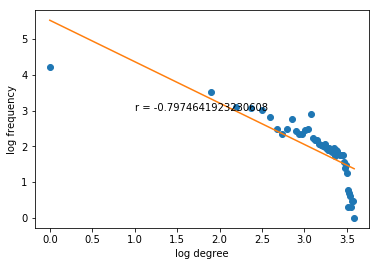

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')
plt.text(1, 3,'r = '+ str(r_value))

In [12]:
# a glance at the old data
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/node_anno_df')
pan = pd.read_csv('/home/hermuba/data0118/cdhit/clstr/pangenome_df/Escherichia0.70.clstr.csv', index_col = 0, header = 0)
count = pan.merge(gold_anno[['cluster', 'GO']], left_index = True, right_on = 'cluster').drop(columns = ['GO', 'cluster'], axis = 1).sum(axis = 1)
gold_anno['count'] = count
gold_anno['is_card']=gold_anno['card'].notnull()
gold_anno.loc[gold_anno.loc[gold_anno['count'] >1500].index, 'core'] = True
gold_anno['core'] = gold_anno['core'].fillna(False)
gold_anno['is_card'] = gold_anno['is_card'].fillna(False)

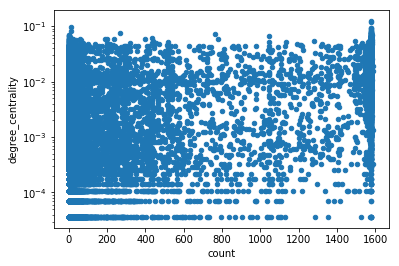

In [13]:
dc = nx.algorithms.centrality.degree_centrality(combined)
for k in dc.keys():
    gold_anno.loc[k ,'degree_centrality']  = dc[k]
gold_anno['degree_centrality'] = gold_anno['degree_centrality'].astype(float)
gold_anno.plot(kind='scatter', x = 'count', y='degree_centrality', logy=True)

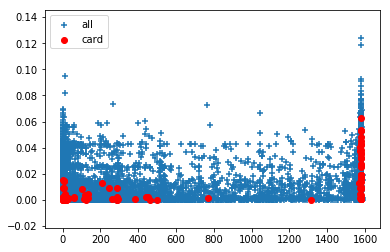

In [14]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.scatter(gold_anno['count'], gold_anno['degree_centrality'],marker = '+', label = 'all')
ax.scatter(gold_anno.loc[gold_anno['is_card']==1]['count'], gold_anno.loc[gold_anno['is_card']==1]['degree_centrality'], c='red', label = 'card')
#ax.set_yscale('log')
ax.legend()

# finding a lot more CARD genes

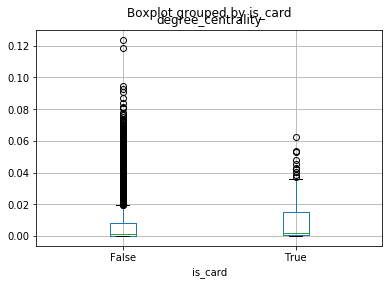

In [15]:
gold_anno.boxplot(by = 'is_card', column = 'degree_centrality')

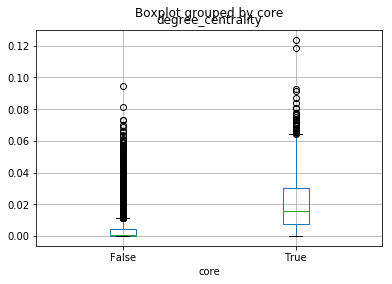

In [16]:
gold_anno.boxplot(by = 'core', column = 'degree_centrality')

In [30]:
nx.write_edgelist(combined, '/home/hermuba/data0118/network1122/combined_lls_edgelist')

In [19]:
gold_anno.to_csv(path + 'gold_anno_quad.csv')

# Contributions from each net

In [20]:
v = {'None':0}
for edge in combined.edges:
    attr = combined.get_edge_data(edge[0], edge[1])
    try:
        del attr['weighted_mutual']
    except KeyError:
        pass
    if str(attr) not in v:
        v[str(attr)] = 1
    else:
        v[str(attr)] = v[str(attr)] +1
        

In [21]:
v

{'None': 0,
 "{'refseq': True}": 404602,
 "{'eskape': True}": 28169,
 "{'domain': True}": 1763908,
 "{'refseq': True, 'eskape': True}": 16362,
 "{'refseq': True, 'eskape': True, 'domain': True}": 2994,
 "{'refseq': True, 'domain': True}": 11416,
 "{'refseq': True, 'string': True}": 42000,
 "{'refseq': True, 'eskape': True, 'string': True}": 917,
 "{'eskape': True, 'string': True}": 988,
 "{'string': True}": 380504,
 "{'refseq': True, 'string': True, 'domain': True}": 321,
 "{'string': True, 'domain': True}": 35753,
 "{'refseq': True, 'eskape': True, 'string': True, 'domain': True}": 15,
 "{'eskape': True, 'domain': True}": 1379,
 "{'eskape': True, 'string': True, 'domain': True}": 462}

In [15]:
string.number_of_edges()

130709

In [17]:
refseq.number_of_edges()

2470607

In [18]:
eskape.number_of_edges()

173746

In [19]:
domain.number_of_edges()

1993190

In [20]:
%matplotlib inline
import sys
sys.path.append('/home/hermuba/pyvenn')
import venn

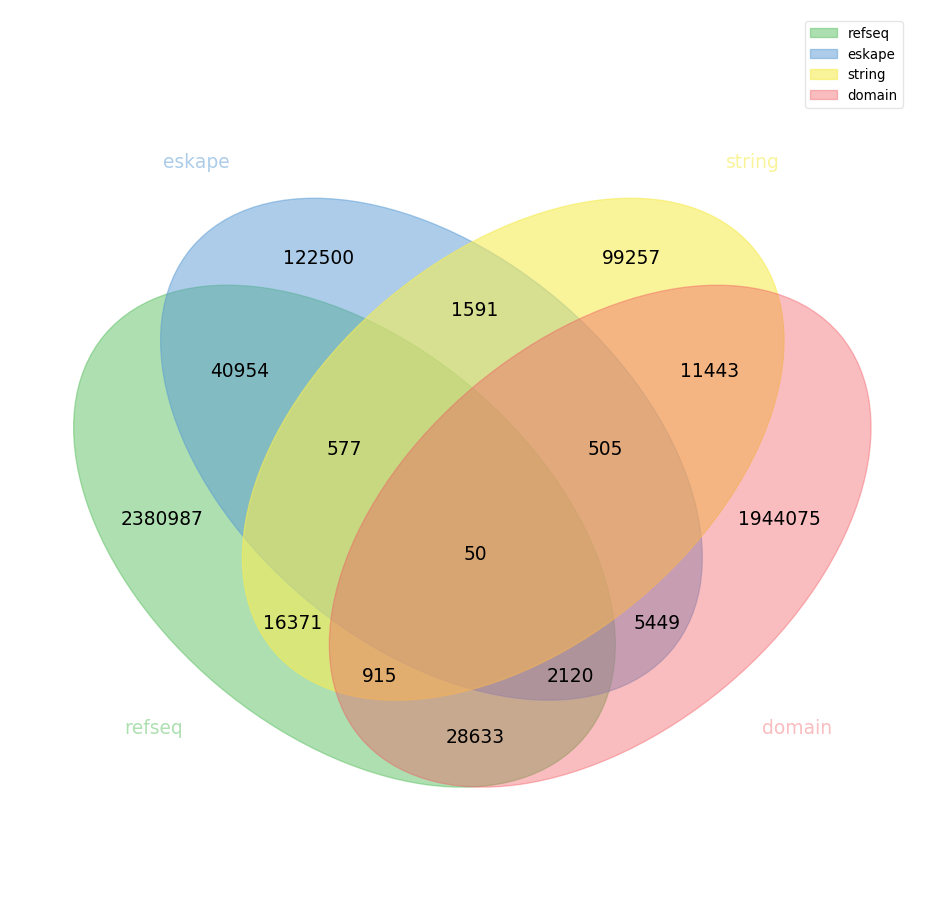

In [22]:
labels = venn.get_labels([refseq.edges, eskape.edges, string.edges, domain.edges], fill=['number'])
fig, ax = venn.venn4(labels, names=['refseq', 'eskape', 'string', 'domain'])
fig.show()

# Architecture

most connected node degree  634


Text(1, 3, 'r = -0.9663414087570702')

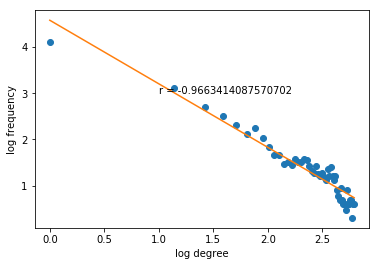

In [25]:
logx, logy, line, slope, r_value, p_value = power_law(eskape)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')
plt.text(1, 3,'r = '+ str(r_value))

most connected node degree  3162


Text(1, 3, 'r = -0.9417363038156334')

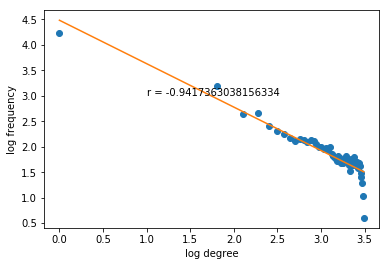

In [26]:
logx, logy, line, slope, r_value, p_value = power_law(refseq)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')
plt.text(1, 3,'r = '+ str(r_value))

most connected node degree  975


Text(1, 3, 'r = -0.8096828250192655')

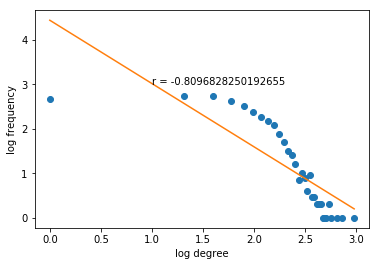

In [27]:
logx, logy, line, slope, r_value, p_value = power_law(string)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')
plt.text(1, 3,'r = '+ str(r_value))

most connected node degree  3784


Text(1, 3, 'r = -0.8135765820841065')

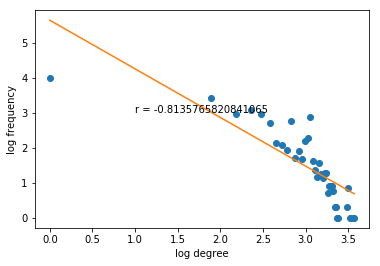

In [28]:
logx, logy, line, slope, r_value, p_value = power_law(domain)
plt.plot(logx, logy, 'o', logx, line)
plt.xlabel('log degree')
plt.ylabel('log frequency')
plt.text(1, 3,'r = '+ str(r_value))

# Investigate components

In [29]:
graphs = list(nx.connected_component_subgraphs(combined))

In [41]:
node_no = [g.number_of_nodes() for g in graphs]

Text(0, 0.5, 'log No. of components')

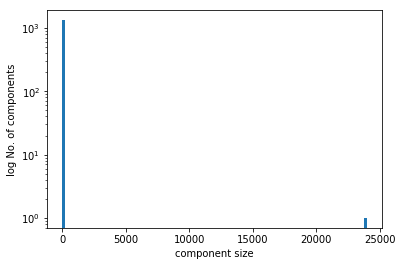

In [42]:
plt.hist(node_no, bins = 100, log = True)
plt.xlabel('component size')
plt.ylabel('log No. of components')

In [43]:
# filter network with degree in order to visualize
deg = combined.degree()

In [44]:
d = [n[0] for n in list(deg) if n[1]>20]

In [45]:
sub = combined.subgraph(d)

In [46]:
nx.write_graphml(sub,path+'sub_quad_combined.xml')

In [47]:
# network stats comparing them
def net_stat(G):
    return([G.number_of_nodes(), G.number_of_edges(), nx.algorithms.components.number_connected_components(G)])

In [48]:
df = pd.DataFrame(columns = ['no_nodes', 'no_edges', 'no_components'], index = ['refseq', 'eskape', 'string','domain', 'pangenomeNet'])
i = 0
for net in [refseq_net, eskape_net, string, domain, combined]:
    
    df.iloc[i] = net_stat(net)
    i+=1

In [49]:
df.to_csv('/home/hermuba/data0118/netstat')